In [6]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json


In [7]:
from fastai import *
from fastai.vision import *

In [8]:
#path = Path('data/food-101/images')
path = Path('../data/subset')


In [9]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=64).normalize(imagenet_stats)

In [10]:
data.classes


['foie_gras',
 'peking_duck',
 'bibimbap',
 'grilled_cheese_sandwich',
 'sushi',
 'cheesecake',
 'mussels',
 'greek_salad',
 'caesar_salad',
 'shrimp_and_grits',
 'baby_back_ribs',
 'hot_and_sour_soup',
 'baklava',
 'tacos',
 'hamburger',
 'pad_thai',
 'gyoza',
 'dumplings',
 'tuna_tartare',
 'pork_chop',
 'panna_cotta',
 'edamame',
 'breakfast_burrito',
 'chicken_curry',
 'carrot_cake',
 'donuts',
 'cannoli',
 'lobster_roll_sandwich',
 'crab_cakes',
 'frozen_yogurt',
 'french_fries',
 'beef_tartare',
 'seaweed_salad',
 'caprese_salad',
 'garlic_bread',
 'takoyaki',
 'lobster_bisque',
 'onion_rings',
 'creme_brulee',
 'ramen',
 'spaghetti_bolognese',
 'ravioli',
 'gnocchi',
 'omelette',
 'hummus',
 'fish_and_chips',
 'prime_rib',
 'bruschetta',
 'scallops',
 'croque_madame',
 'grilled_salmon',
 'falafel',
 'ceviche',
 'fried_calamari',
 'escargots',
 'waffles',
 'club_sandwich',
 'lasagna',
 'chocolate_cake',
 'red_velvet_cake',
 'churros',
 'huevos_rancheros',
 'french_toast',
 'samos

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['foie_gras',
  'peking_duck',
  'bibimbap',
  'grilled_cheese_sandwich',
  'sushi',
  'cheesecake',
  'mussels',
  'greek_salad',
  'caesar_salad',
  'shrimp_and_grits',
  'baby_back_ribs',
  'hot_and_sour_soup',
  'baklava',
  'tacos',
  'hamburger',
  'pad_thai',
  'gyoza',
  'dumplings',
  'tuna_tartare',
  'pork_chop',
  'panna_cotta',
  'edamame',
  'breakfast_burrito',
  'chicken_curry',
  'carrot_cake',
  'donuts',
  'cannoli',
  'lobster_roll_sandwich',
  'crab_cakes',
  'frozen_yogurt',
  'french_fries',
  'beef_tartare',
  'seaweed_salad',
  'caprese_salad',
  'garlic_bread',
  'takoyaki',
  'lobster_bisque',
  'onion_rings',
  'creme_brulee',
  'ramen',
  'spaghetti_bolognese',
  'ravioli',
  'gnocchi',
  'omelette',
  'hummus',
  'fish_and_chips',
  'prime_rib',
  'bruschetta',
  'scallops',
  'croque_madame',
  'grilled_salmon',
  'falafel',
  'ceviche',
  'fried_calamari',
  'escargots',
  'waffles',
  'club_sandwich',
  'lasagna',
  'chocolate_cake',
  'red_velvet_cake

In [16]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)


In [8]:
#learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="../../prod")
#learn.model = torch.nn.DataParallel(learn.model)


In [9]:
learn.fit_one_cycle(4)


Total time: 28:02
epoch  train_loss  valid_loss  error_rate
1      1.661777    1.376873    0.365000    (07:00)
2      1.430065    1.169456    0.310446    (06:57)
3      1.191202    1.008638    0.267673    (07:01)
4      1.074999    0.959696    0.255545    (07:02)



In [13]:
model_name="resnet50"

In [11]:
learn.save(f'{model_name}-stage-1')

In [12]:
learn.load(f'{model_name}-stage-1')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f9558210fd0>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [13]:
learn.unfreeze()


In [14]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


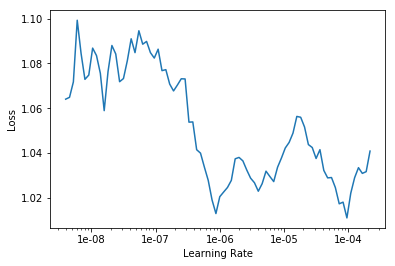

In [15]:
learn.recorder.plot(skip_end=10)


In [16]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))


Total time: 38:13
epoch  train_loss  valid_loss  error_rate
1      1.028403    0.951872    0.254208    (07:38)
2      1.004591    0.938962    0.250842    (07:38)
3      0.985914    0.928245    0.248317    (07:38)
4      0.994276    0.921402    0.247079    (07:38)
5      0.978550    0.923518    0.246485    (07:39)



In [17]:
learn.save(f'{model_name}-stage-2')

# Interpretation

In [18]:
learn.load(f'{model_name}-stage-2')


ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f9558210fd0>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [19]:
interp = ClassificationInterpretation.from_learner(learn)


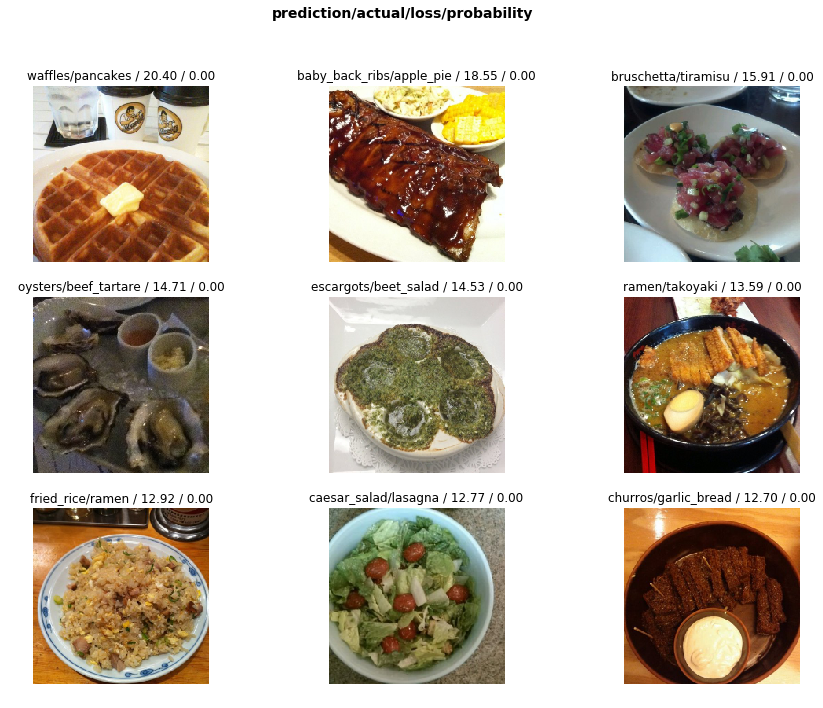

In [20]:
interp.plot_top_losses(9, figsize=(15,11))


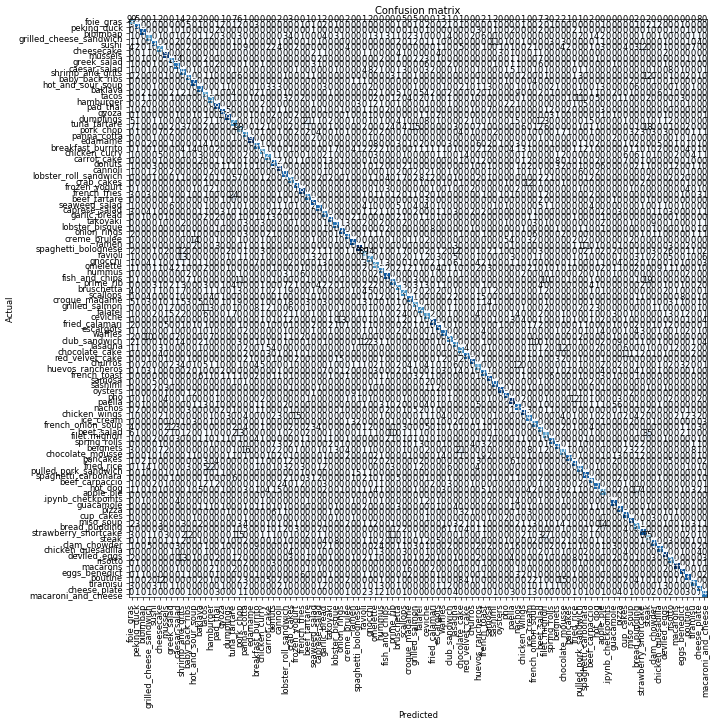

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [22]:
interp.most_confused(min_val=2)


[('filet_mignon', 'steak', 35),
 ('steak', 'filet_mignon', 27),
 ('beef_tartare', 'tuna_tartare', 24),
 ('pulled_pork_sandwich', 'hamburger', 22),
 ('tuna_tartare', 'beef_tartare', 21),
 ('chocolate_mousse', 'chocolate_cake', 21),
 ('prime_rib', 'steak', 19),
 ('pork_chop', 'steak', 18),
 ('apple_pie', 'bread_pudding', 17),
 ('chocolate_mousse', 'panna_cotta', 16),
 ('pork_chop', 'grilled_salmon', 15),
 ('ice_cream', 'frozen_yogurt', 15),
 ('steak', 'pork_chop', 15),
 ('tiramisu', 'chocolate_mousse', 15),
 ('greek_salad', 'caesar_salad', 14),
 ('ramen', 'hot_and_sour_soup', 14),
 ('ravioli', 'gnocchi', 14),
 ('bread_pudding', 'apple_pie', 14),
 ('gnocchi', 'shrimp_and_grits', 13),
 ('fried_calamari', 'onion_rings', 13),
 ('filet_mignon', 'pork_chop', 13),
 ('risotto', 'shrimp_and_grits', 13),
 ('cheesecake', 'strawberry_shortcake', 12),
 ('baby_back_ribs', 'steak', 12),
 ('tuna_tartare', 'beet_salad', 12),
 ('frozen_yogurt', 'ice_cream', 12),
 ('ravioli', 'shrimp_and_grits', 12),
 ('ra

In [14]:
final_model_name = f'{model_name}-final'

In [24]:
learn.save(final_model_name)

# Testing on Different Data

### Loading Trained model

In [17]:
learn.load(final_model_name)

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f7af99b5198>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [19]:
learn.data.classes

['foie_gras',
 'peking_duck',
 'bibimbap',
 'grilled_cheese_sandwich',
 'sushi',
 'cheesecake',
 'mussels',
 'greek_salad',
 'caesar_salad',
 'shrimp_and_grits',
 'baby_back_ribs',
 'hot_and_sour_soup',
 'baklava',
 'tacos',
 'hamburger',
 'pad_thai',
 'gyoza',
 'dumplings',
 'tuna_tartare',
 'pork_chop',
 'panna_cotta',
 'edamame',
 'breakfast_burrito',
 'chicken_curry',
 'carrot_cake',
 'donuts',
 'cannoli',
 'lobster_roll_sandwich',
 'crab_cakes',
 'frozen_yogurt',
 'french_fries',
 'beef_tartare',
 'seaweed_salad',
 'caprese_salad',
 'garlic_bread',
 'takoyaki',
 'lobster_bisque',
 'onion_rings',
 'creme_brulee',
 'ramen',
 'spaghetti_bolognese',
 'ravioli',
 'gnocchi',
 'omelette',
 'hummus',
 'fish_and_chips',
 'prime_rib',
 'bruschetta',
 'scallops',
 'croque_madame',
 'grilled_salmon',
 'falafel',
 'ceviche',
 'fried_calamari',
 'escargots',
 'waffles',
 'club_sandwich',
 'lasagna',
 'chocolate_cake',
 'red_velvet_cake',
 'churros',
 'huevos_rancheros',
 'french_toast',
 'samos

In [20]:
data2 = ImageDataBunch.single_from_classes(path, data.classes
                                           , tfms=get_transforms()
                                           , size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet50)
learn.load(final_model_name)

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f7af8dd2128>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [21]:
data2.classes, data2.c

(['foie_gras',
  'peking_duck',
  'bibimbap',
  'grilled_cheese_sandwich',
  'sushi',
  'cheesecake',
  'mussels',
  'greek_salad',
  'caesar_salad',
  'shrimp_and_grits',
  'baby_back_ribs',
  'hot_and_sour_soup',
  'baklava',
  'tacos',
  'hamburger',
  'pad_thai',
  'gyoza',
  'dumplings',
  'tuna_tartare',
  'pork_chop',
  'panna_cotta',
  'edamame',
  'breakfast_burrito',
  'chicken_curry',
  'carrot_cake',
  'donuts',
  'cannoli',
  'lobster_roll_sandwich',
  'crab_cakes',
  'frozen_yogurt',
  'french_fries',
  'beef_tartare',
  'seaweed_salad',
  'caprese_salad',
  'garlic_bread',
  'takoyaki',
  'lobster_bisque',
  'onion_rings',
  'creme_brulee',
  'ramen',
  'spaghetti_bolognese',
  'ravioli',
  'gnocchi',
  'omelette',
  'hummus',
  'fish_and_chips',
  'prime_rib',
  'bruschetta',
  'scallops',
  'croque_madame',
  'grilled_salmon',
  'falafel',
  'ceviche',
  'fried_calamari',
  'escargots',
  'waffles',
  'club_sandwich',
  'lasagna',
  'chocolate_cake',
  'red_velvet_cake

**bibimbap**

In [22]:
bibimbap_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dolsot-bibimbap.jpg/1200px-Dolsot-bibimbap.jpg"

In [23]:
#!wget {url} -O sample.jpg

In [24]:
url = bibimbap_url

In [25]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [26]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class , pred_idx, outputs

('bibimbap',
 tensor(2),
 tensor([4.4658e-01, 7.5792e-01, 1.2906e+06, 4.7675e-01, 4.6781e+00, 7.2811e-02,
         1.4917e+01, 5.0106e+01, 5.0284e+01, 4.5911e-01, 1.1288e+01, 2.8635e+00,
         2.6783e+00, 1.4128e+00, 6.9524e-01, 4.5461e+01, 1.9216e-01, 1.0676e+01,
         5.4709e-02, 2.4734e+00, 3.6554e-01, 1.8771e+01, 1.3060e+00, 1.0839e+01,
         2.2399e+00, 8.7929e-02, 7.9495e-01, 2.3426e+00, 7.4467e-02, 6.8849e+00,
         1.7321e+00, 1.3326e+00, 1.1093e+02, 1.4536e-01, 2.7081e-02, 1.7644e+00,
         4.6659e-01, 7.3097e-02, 1.0076e-01, 7.0958e+03, 3.3457e+01, 4.1404e-01,
         3.7334e+00, 2.1953e-01, 1.1882e+01, 1.0508e+00, 2.2689e+00, 3.5295e-02,
         1.5049e+00, 8.8663e-01, 4.0207e+00, 1.3321e+01, 9.5802e-01, 1.9394e-01,
         5.1207e+00, 2.5209e-02, 7.8254e-01, 3.4197e-01, 1.4885e+01, 9.3855e-01,
         7.5009e-01, 1.6875e+01, 1.0498e-01, 1.4835e-01, 4.7807e+01, 2.0584e+00,
         5.1512e+01, 2.2985e+01, 2.7875e-01, 1.4404e+00, 3.9990e-01, 4.6952e+00,
   

In [27]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

**Baby Back Rib**

In [28]:
baby_back_url ="https://upload.wikimedia.org/wikipedia/commons/e/ee/Baby_back_ribs_with_fries.jpg"

[('baby_back_ribs', 41593.98046875),
 ('steak', 21473.564453125),
 ('prime_rib', 5033.3828125),
 ('filet_mignon', 4422.6865234375),
 ('pork_chop', 622.516845703125)]


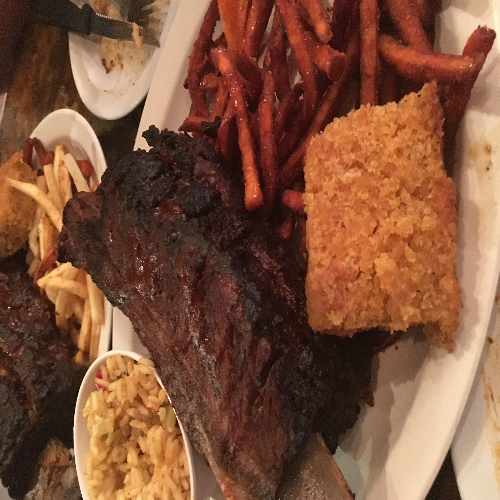

In [29]:
predict(baby_back_url)

**Cat**

In [30]:
cat_image_url = "https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__480.jpg"

[('ice_cream', 1389.80322265625),
 ('miso_soup', 568.42333984375),
 ('guacamole', 287.42791748046875),
 ('ceviche', 109.05315399169922),
 ('chocolate_mousse', 82.59376525878906)]


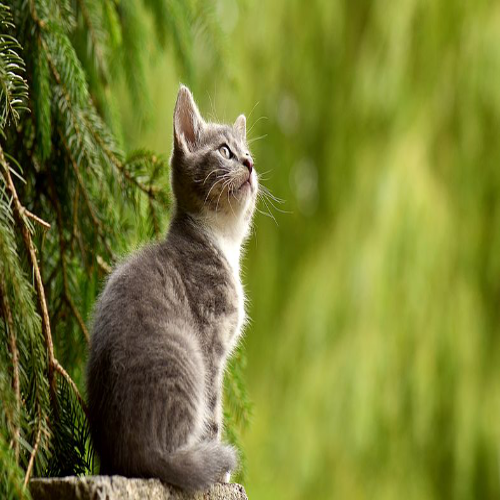

In [31]:
predict(cat_image_url)

**Icecream**

In [32]:
icecream_url = "https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg"

[('ice_cream', 197578.9375),
 ('waffles', 4615.50537109375),
 ('chocolate_mousse', 3772.375732421875),
 ('frozen_yogurt', 2756.7685546875),
 ('apple_pie', 1537.1826171875)]


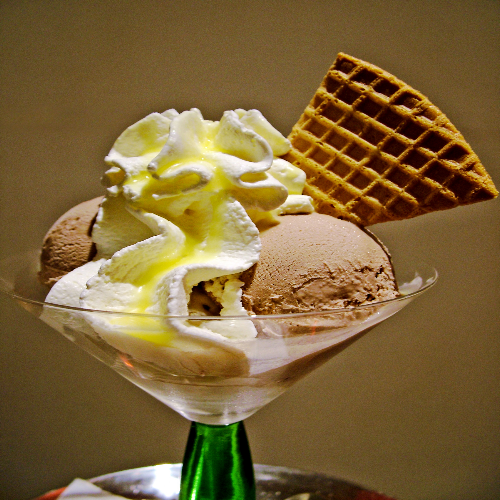

In [36]:
predict(icecream_url)

**Banana**

In [37]:
banana_url = "https://upload.wikimedia.org/wikipedia/commons/d/de/Bananavarieties.jpg"

[('mussels', 985.7973022460938),
 ('macarons', 711.2047119140625),
 ('cheese_plate', 286.27947998046875),
 ('foie_gras', 101.3785629272461),
 ('hot_dog', 91.1393051147461)]


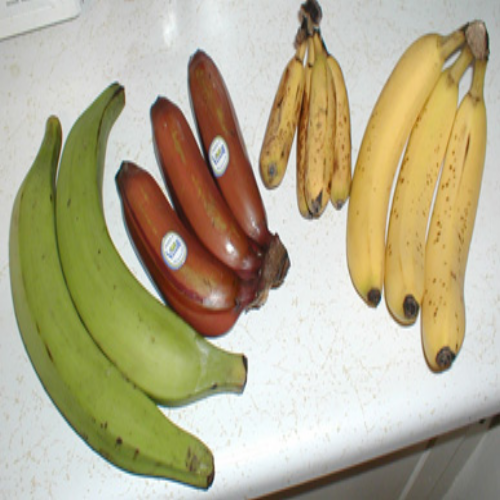

In [38]:
predict(banana_url)

# Prepare for production

In [39]:
path.ls()

[PosixPath('../data/subset/train'), PosixPath('../data/subset/models')]

In [40]:
shutil.rmtree("../models",ignore_errors=True)

In [41]:
shutil.copytree(path/"models", "../models")

'../models'

In [42]:
f"{learn.data.classes}"

"['foie_gras', 'peking_duck', 'bibimbap', 'grilled_cheese_sandwich', 'sushi', 'cheesecake', 'mussels', 'greek_salad', 'caesar_salad', 'shrimp_and_grits', 'baby_back_ribs', 'hot_and_sour_soup', 'baklava', 'tacos', 'hamburger', 'pad_thai', 'gyoza', 'dumplings', 'tuna_tartare', 'pork_chop', 'panna_cotta', 'edamame', 'breakfast_burrito', 'chicken_curry', 'carrot_cake', 'donuts', 'cannoli', 'lobster_roll_sandwich', 'crab_cakes', 'frozen_yogurt', 'french_fries', 'beef_tartare', 'seaweed_salad', 'caprese_salad', 'garlic_bread', 'takoyaki', 'lobster_bisque', 'onion_rings', 'creme_brulee', 'ramen', 'spaghetti_bolognese', 'ravioli', 'gnocchi', 'omelette', 'hummus', 'fish_and_chips', 'prime_rib', 'bruschetta', 'scallops', 'croque_madame', 'grilled_salmon', 'falafel', 'ceviche', 'fried_calamari', 'escargots', 'waffles', 'club_sandwich', 'lasagna', 'chocolate_cake', 'red_velvet_cake', 'churros', 'huevos_rancheros', 'french_toast', 'samosa', 'sashimi', 'oysters', 'pho', 'paella', 'nachos', 'chicken_

In [43]:
with open('../models/classes.txt', 'w') as f:
    json.dump(learn.data.classes,f)